# **Best market to advertise in**
For this project we are assume to be working a data analyst for an e-commerce company that offers courses on programming. Most of the courses are on web and mobile development, but they also cover many other domains, like data science, game development etc. They just want to promote their product and like to invest some money in advertisements. 

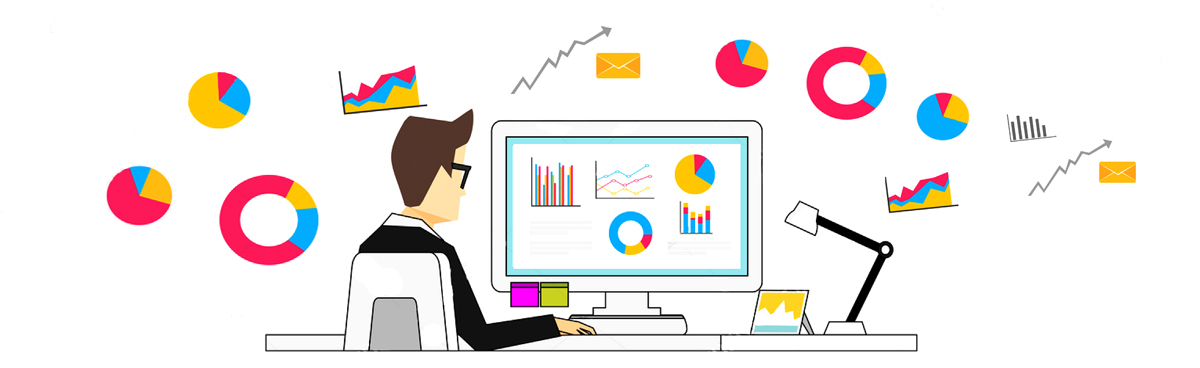[Source](https://images.app.goo.gl/S9zJQmpq9VY6MMV9A)

# **Goal**
- Our goal for this project is to find two best markets to advertise our product, so we get it promoted in a better way.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first. We can try the existing data from freeCodeCamp's 2017 New Coder Survey. [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning plateform to learn programming, which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey) also you can check the documentation there.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading data

In [2]:
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

# show all columns
pd.set_option("max_columns",136)
# print first five lines
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [3]:
#shape of dataset
fcc.shape

(18175, 136)

This dataset has large number of columns, only few of them are helpful for us to do analysis.
For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

### Check whether data is representative or not
The data may be called representative when it consist of all the content we require, like data related to web and mobile development, data science and mobile development etc.

We'll try to answer these questions alongwith the analysis:
- Are people interested in only one subject or they can be interested in more than one subject?
- If most people are interested in more than one subject, is this sample still representative?
- The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?

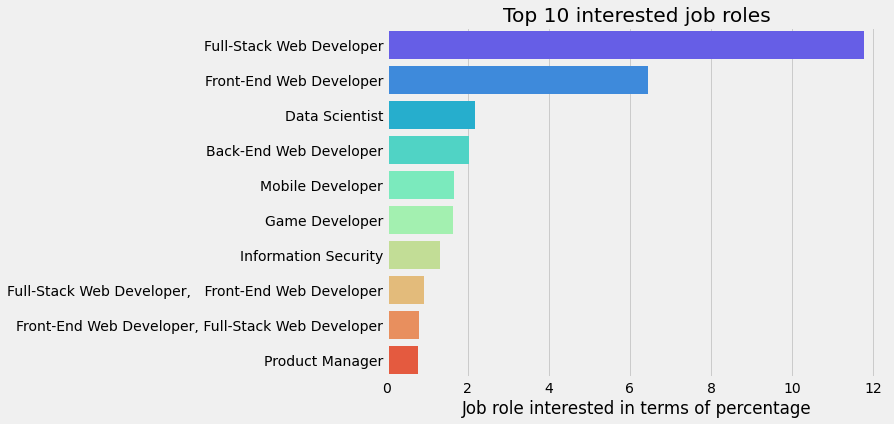

In [4]:
# setting style to five thirty eight
plt.style.use('fivethirtyeight')

# creating a frequency dataframe
freq_dist = fcc['JobRoleInterest'].value_counts(normalize=True)*100
fig = plt.figure(figsize=(8,6))
freq_df = pd.DataFrame(freq_dist, columns=['JobRoleInterest'])
top_10 = freq_df.iloc[:10]

# plotting bar graph
sns.barplot(y=top_10.index, x='JobRoleInterest', data=top_10, palette='rainbow')
plt.xlabel('Job role interested in terms of percentage')
plt.title('Top 10 interested job roles');

Yes, the dataset meet our expections so we can say it is representative and we can proceed our analysis further.

In [5]:
# adding a new columns which consist no.of job roles a person interested in
freq_df['Subjects'] = freq_df.index.str.split(',').str.len()

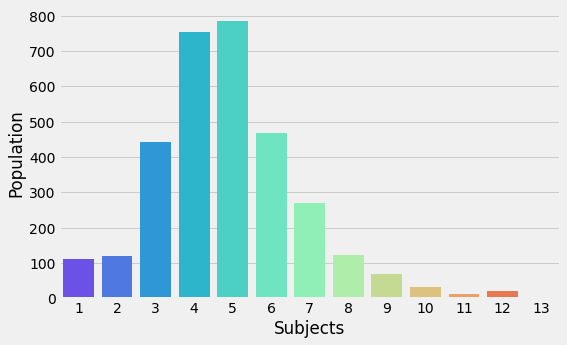

In [6]:
plt.figure(figsize=(8,5))
counts = freq_df['Subjects'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='rainbow')
plt.xlabel('Subjects')
plt.ylabel('Population');

We can see most of the people are insterested in more than one or two subjects. Now that we found out that the sample has the right categories of people for our purpose that is number of people who want to learn web and mobile development are mostly present, so we can begin analyzing it.

### Finding the best market
We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location. For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

- **Absolute frequency** 

In [7]:
# dropping all the rows where participants did not answer
fcc_new = fcc[fcc['JobRoleInterest'].notnull()].copy()

# distribution of coders across various countries
fcc_new['CountryLive'].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
                            ... 
Somalia                        1
Gibraltar                      1
Gambia                         1
Angola                         1
Trinidad & Tobago              1
Name: CountryLive, Length: 137, dtype: int64

- **Relative frequency**

In [8]:
fcc_new['CountryLive'].value_counts(normalize=True)*100

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
                              ...    
Somalia                      0.014624
Gibraltar                    0.014624
Gambia                       0.014624
Angola                       0.014624
Trinidad & Tobago            0.014624
Name: CountryLive, Length: 137, dtype: float64

Here are the top countries where we can advertise in:
- United States of America
- India
- United Kingdom
- Canada
- Poland
- Brazil etc.

But we can not stop our analysis here, we need to go more in depth with our analysis before making any decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The **MoneyForLearning** column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: **US, India, United Kingdom, and Canada**. Two reasons for this decision are:
- These are the countries where most of the coders live. So we have enough data to proceed.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [9]:
fcc_new['MonthsProgramming'].replace({0:1}, inplace=True)

# creating a new column which shows money spent by the people per month
fcc_new['Money_spent'] = fcc_new['MoneyForLearning'] / fcc_new['MonthsProgramming']

# display null values
print('Total null values in Money_spent column are',fcc_new['Money_spent'].isnull().sum())

Total null values in Money_spent column are 675


Now we will keep just those rows where the new column **Money_spent** and **CountryLive** do not have null values. Let's do it.

In [10]:
notnull_money = fcc_new['Money_spent'].notnull()
notnull_country = fcc_new['CountryLive'].notnull()

# filtering data
fcc_new = fcc_new[notnull_money & notnull_country].copy()

# checking whether the two columns have null values or not
print('Total null values in Money_spent column :', fcc_new.Money_spent.isnull().sum())
print('Total null values in CountryLive column :', fcc_new.CountryLive.isnull().sum())

Total null values in Money_spent column : 0
Total null values in CountryLive column : 0


### Grouping the data on the basis of countries
Now, we would group the remain data on the basis of countries where coders live, this would help us to see how much an average coders spends in these country. This would help us to see which country we should focus on.

In [11]:
grouped = fcc_new.groupby('CountryLive')

In [12]:
print('The average money a person spends in the countries we chosen :'+'\n'+'-'*60)
avg_money_spent = grouped['Money_spent'].agg([np.mean]).loc[['United States of America','India','United Kingdom','Canada']]
avg_money_spent

The average money a person spends in the countries we chosen :
------------------------------------------------------------


,mean
CountryLive,
United States of America,227.997996
India,135.100982
United Kingdom,45.534443
Canada,113.510961


Although, there are more coders in United Kingdom than Canada but, the average money spent by Canada people is larger than United Kingdom. 

We will also observe that most of the countries are there where average money spent is much larger than the country we chosen, but those countries have very less coders and in order to make money we will have to convince 80-90% of the coders which seems to be too much difficult. 

And on the other hand if we have countries where large number of coders are there and if we are able to convince even 30% of the coders then it would be very helpful for our business.

**Note :** The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics like GDP, we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

In [13]:
usa = grouped.get_group('United States of America')
india = grouped.get_group('India')
uk = grouped.get_group('United Kingdom')
canada = grouped.get_group('Canada')

# data contains only four country's rows
data = pd.concat([usa,india,uk,canada], axis=0, ignore_index=True)

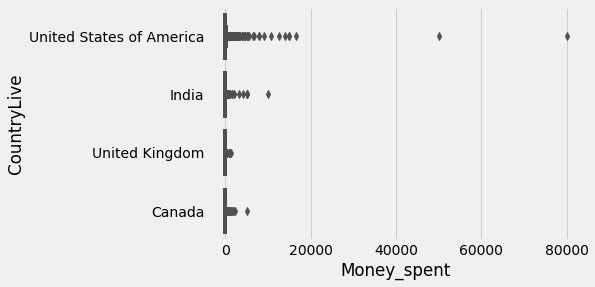

In [14]:
sns.boxplot(y='CountryLive', x='Money_spent', data=data, palette='rainbow')

We need to remove outliers, because it is cumbersome to under the boxplots.

In [15]:
data = data[data.Money_spent <= 5000].copy()

In [16]:
data.groupby('CountryLive')['Money_spent'].agg([np.mean])

,mean
CountryLive,
Canada,113.510961
India,113.748387
United Kingdom,45.534443
United States of America,138.982678


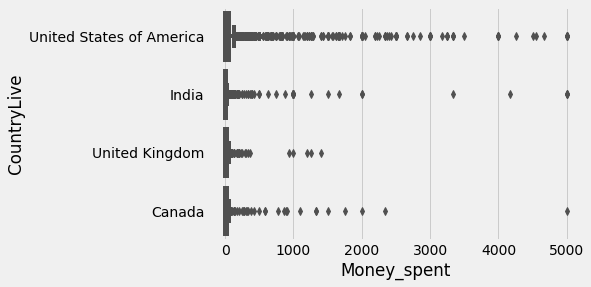

In [17]:
sns.boxplot(y='CountryLive', x='Money_spent', data=data, palette='rainbow')

Still, it is quite unclear to choose between these countries, but it seems if we choose USA and India we can get profit, **we are highly sure to advertise our product in USA but no idea about second country.** We don't have strong evidence till now, so we should choose another way. 

The outliers may be due to attempting the bootcamp, because we are getting some amount of higher money spent which for sure can be due to bootcamp. If it is then it can justify the large amount of money spent.

In [18]:
data.head(10)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,...,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_spent
0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,...,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
1,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,...,no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,N

### Attended bootcamp

In [19]:
boot_camp = data[data.AttendedBootcamp != 0]

In [20]:
boot_camp['CountryLive'].value_counts()

United States of America    244
Canada                       10
India                         9
United Kingdom                7
Name: CountryLive, dtype: int64

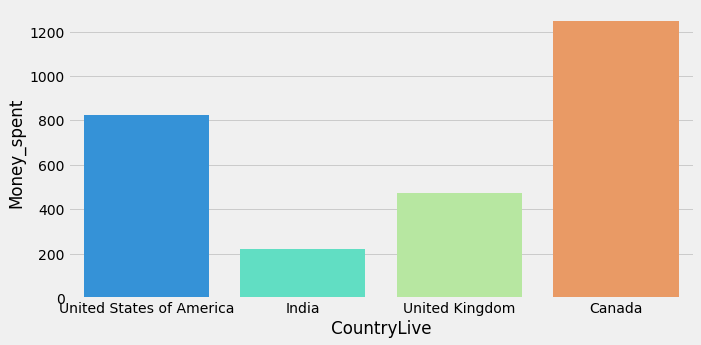

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x='CountryLive',y='Money_spent', data=boot_camp, palette='rainbow',ci=None)

India is the country where people did not attend much bootcamps, but it is vague to pick up it as second country. The same case is with Canada and UK.  

### Did not attend bootcamp

In [22]:
# people did not attend bootcamps
no_boot_camp = data[data.AttendedBootcamp == 0]

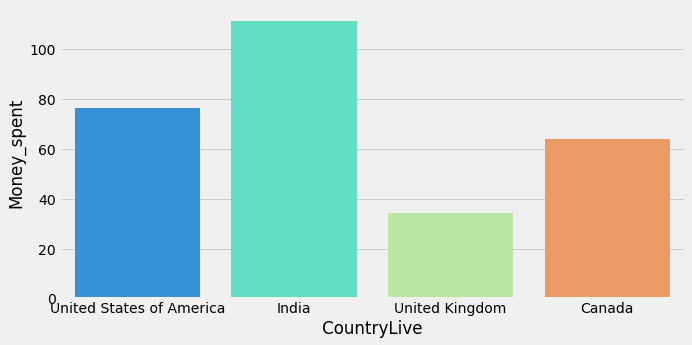

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='CountryLive',y='Money_spent', data=no_boot_camp, palette='rainbow',ci=None);

The country where people attends bootcamps are unlikely to take online courses because they cannot give efficient time, so they mostly refuse to take online courses if they are attending bootcamps.

As we can see with the help of bar plots, people of India joined bootcamp in very less amount. Whereas other countries take them most like USA, Canada and UK. We can see that people of India prefer to take online courses than other countries. So we can use it as a proxy to come on to the final conclusion of opting countries for advertisement.

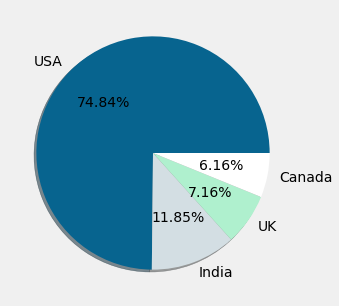

In [24]:
val = data['CountryLive'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(val,labels=['USA','India','UK','Canada'],colors=['#07648f','#d3dee3','#aff0ce','white'],shadow=True, autopct='%.2f%%');

# **Conclusion**
For sure we will advertise in USA and India, but it would be profitable for us if at the place of two market place we choose 3 or four. For best results we would highly advertise in India and USA because they are the countries we the population of coders is vaste and there is not doubt we can get a good revenue out from these countries.